In [1]:
#Importing Libraries
import numpy as np #For calculations
import sklearn #For the dataset
from sklearn import datasets
import matplotlib.pyplot as plt #For plotting
from random import sample
from mpl_toolkits import mplot3d #For 3D plotting
%matplotlib inline

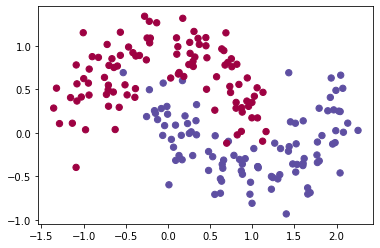

In [13]:
#Generating the dataset
np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)

#### New dataset for part 6

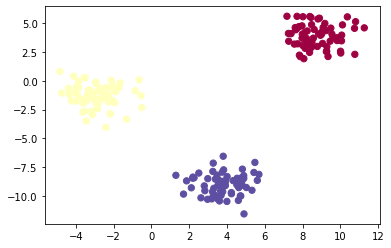

In [12]:
x, y = sklearn.datasets.make_blobs(n_samples=200, centers=3, n_features = 2)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [14]:
num_examples = len(x) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [4]:
def sigmoid(x):
    r = 1 / (1 - np.exp(-x))
    return r

In [5]:
def sigmoid_derivative(x):
    s = sigmoid(x)
    r = s * (1-s)
    return r

In [4]:
def ReLU(x):
    r = max(0.0, x)
    return r
relu = np.vectorize(ReLU)

In [12]:
def ReLU_derivative(x):
    if x<0:
        return 0
    return 1
ReLU = np.vectorize(ReLU_derivative)

In [4]:
def calculate_loss(model):
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']#new7
    # Forward propagation to calculate our predictions
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
#     a1 = sigmoid(z1) #new5-1
    z2 = a1.dot(W2) + b2 
    a2 = np.tanh(z2) #new7
    z3 = a2.dot(W3) + b3 #new7
    exp_scores = np.exp(z3) #new7
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))#new7
    return 1./num_examples * data_loss

In [5]:
# Helper function to predict an output (0 or 1)
def predict(model, X):
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3'] #new7
    
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
#     a1 = sigmoid(z1) #new5-1
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2) #new7
    z3 = a2.dot(W3) + b3 #new7
    exp_scores = np.exp(z3) #new7
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [6]:
#This function learns parameters for the neural network and returns the model.
#- nn_hdim: Number of nodes in the hidden layer
#- num_passes: Number of passes through the training data for gradient descent
#- print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim_one, nn_hdim_two , num_passes=20000, print_loss=False):
    #Initialize the parameters to random values. We need to learn these.
    global epsilon
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim_one) / np.sqrt(nn_input_dim)#new7
    b1 = np.zeros((1, nn_hdim_one))#new7
    W2 = np.random.randn(nn_hdim_one, nn_hdim_two) / np.sqrt(nn_hdim_one)#new7
    b2 = np.zeros((1, nn_hdim_two))#new7
    W3 = np.random.randn(nn_hdim_two, nn_output_dim) / np.sqrt(nn_hdim_two)#new7
    b3 = np.zeros((1, nn_output_dim))#new7
    
    #This is what we return at the end
    model = {}
    
    help1 = num_examples//2#new3
    
    epsilon = 0.4 #new4
    
    #Gradient descent. For each batch...
    for i in range(0, num_passes):
        X = [x[:help1], x[help1:]]#new3
        Y = [y[:help1], y[help1:]]#new3
        for j in range(2):
            # Forward propagation
            z1 = X[j].dot(W1) + b1
            a1 = np.tanh(z1)
#             a1 = sigmoid(z1) #new5-1
            z2 = a1.dot(W2) + b2
            a2 = np.tanh(z2)#new7
            z3 = a2.dot(W3) + b3 #new7
            exp_scores = np.exp(z3)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

            # Backpropagation
            
            delta_new_four = probs #new7
            delta_new_four[range(help1), Y[j]] -= 1 #new7
            dW_new_three = (a2.T).dot(delta_new_four) #new7
            db_new_three = np.sum(delta_new_four, axis=0, keepdims=True) #new7
            delta3 = delta_new_four.dot(W3.T)*(1 - np.power(a2, 2))
#             delta3[range(help1), Y[j]] -= 1#new3
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
#             delta2 = delta3.dot(W2.T) * (sigmoid_derivative(a1)) #new5-1
            dW1 = np.dot(X[j].T, delta2)#new3
            db1 = np.sum(delta2, axis=0)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW_new_three += reg_lambda * W3 #new7
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1

            # Gradient descent parameter update
            W1 += -epsilon * dW1
            b1 += -epsilon * db1
            W2 += -epsilon * dW2
            b2 += -epsilon * db2
            W3 += -epsilon * dW_new_three #new7
            b3 += -epsilon * db_new_three #new7

            # Assign new parameters to the model
            model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}
            
            epsilon*=0.99 #new4

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset.
            if print_loss and (i % 5000 == 0 or i==19000):
                print ("Iteration:", i, "Loss:", calculate_loss(model))
    return model

### Part one:
The only thing I did in this part was to call 'build_model' function with nn_hdim being set to 3.\
After that i plotted the desicion boundary.

In [7]:
def plot():
    minX = x[:,0].min() 
    maxX = x[:,0].max() 

    minY = x[:,1].min()
    maxY = x[:,1].max()

    one_dim1 = np.arange(minX, maxX, 0.1)
    one_dim2 = np.arange(minY, maxY, 0.1)

    #np.meshgrid function creates a rectangular grid out of two one-dimensional arrays 
    k, l = np.meshgrid(one_dim1, one_dim2)


    #.rave() function somehow flattens the array. For example assume a=[[1,2],[3,4]] then ravel function will 
    #reshape it to [1,2,3,4]
    P = predict(model, np.c_[k.ravel(), l.ravel()])
    P = P.reshape(k.shape)

    #plotting the desicion boundry
    plt.figure(num=None, figsize=(6, 3), dpi=90, facecolor='w', edgecolor='red')

    plt.scatter(x[:, 0], x[:, 1], c=y, s=50, edgecolor='red')
    plt.contourf(k, l, P, alpha=0.3)

    plt.show()  

Iteration: 0 Loss: 0.43238663152549245
Iteration: 5000 Loss: 0.07075120475417294
Iteration: 10000 Loss: 0.07075830166576016
Iteration: 15000 Loss: 0.07075827250923583
Iteration: 19000 Loss: 0.07075799502270258


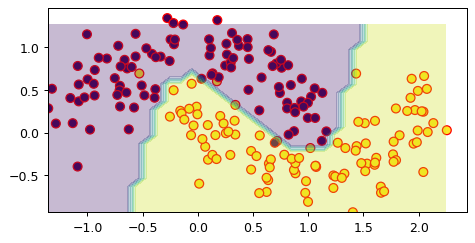

In [50]:
#building model with hidden layer size being set to 3
model = build_model(3, print_loss=True)

plot()

### part two:
I ran 'build_model' funtion with inputs 1, 2, 3, 4, 5, 20 and 40 and decided how this change in parameters, changed the output and loss of my network.

Iteration: 0 Loss: 0.5672795490643402
Iteration: 5000 Loss: 0.3334655784369934
Iteration: 10000 Loss: 0.333435453111018
Iteration: 15000 Loss: 0.33342437117708057
Iteration: 19000 Loss: 0.33342081982921445


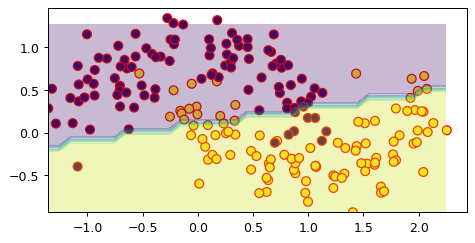

In [53]:
model = build_model(1, print_loss=True)
plot()

Iteration: 0 Loss: 0.5465442859821489
Iteration: 5000 Loss: 0.32057864607545605
Iteration: 10000 Loss: 0.3284286850434387
Iteration: 15000 Loss: 0.3183979697167772
Iteration: 19000 Loss: 0.32410019077774144


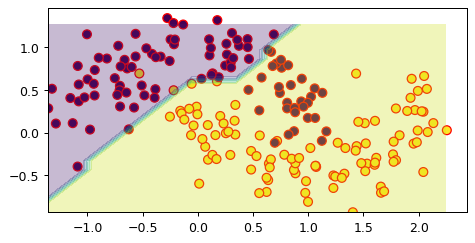

In [56]:
model = build_model(2, print_loss=True)
plot()

Iteration: 0 Loss: 0.46646126452320086
Iteration: 5000 Loss: 0.05517119937721212
Iteration: 10000 Loss: 0.05029186846284489
Iteration: 15000 Loss: 0.05024038291082288
Iteration: 19000 Loss: 0.05409431660681232


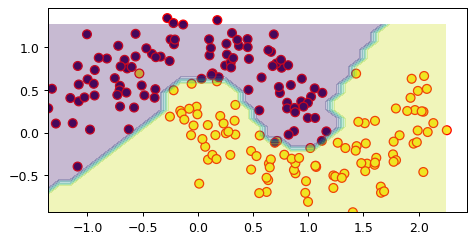

In [59]:
model = build_model(4, print_loss=True)
plot()

Iteration: 0 Loss: 0.6138966241723387
Iteration: 5000 Loss: 0.03973151596662999
Iteration: 10000 Loss: 0.03909300715763201
Iteration: 15000 Loss: 0.039041898930583664
Iteration: 19000 Loss: 0.03903707356256431


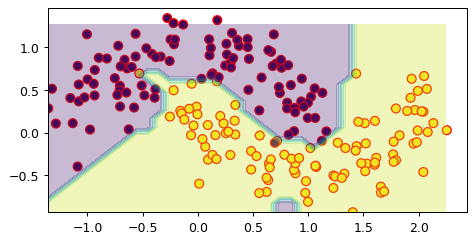

In [62]:
model = build_model(5, print_loss=True)
plot()

Iteration: 0 Loss: 0.49853824174345457
Iteration: 5000 Loss: 0.03424723242388392
Iteration: 10000 Loss: 0.031943045960717446
Iteration: 15000 Loss: 0.03103890643514712
Iteration: 19000 Loss: 0.030774479774914352


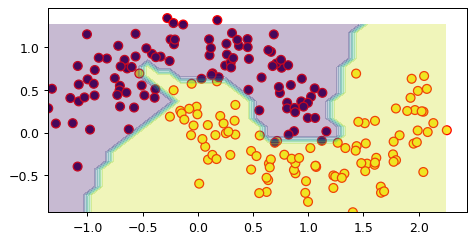

In [65]:
model = build_model(20, print_loss=True)
plot()

Iteration: 0 Loss: 0.7646163724939387
Iteration: 5000 Loss: 0.038078722625202836
Iteration: 10000 Loss: 0.03484774886998133
Iteration: 15000 Loss: 0.03262080110784792
Iteration: 19000 Loss: 0.03179117830421532


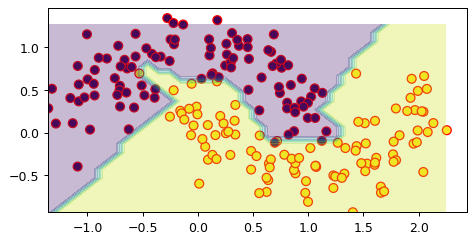

In [68]:
model = build_model(40, print_loss=True)
plot()

| hidden layer size | Loss | 
| --- | --- | 
| 1 |  0.33342081982921445 |
| 2 |  0.32410019077774144 |
| 3 |  0.07075799502270258 |
| 4 |  0.05409431660681232 |
| 5 |  0.03903707356256431 |
| 20 | 0.030774479774914352 |
| 40 |  0.03179117830421532 |

Conclusion: increasing the size of the hidden layer will help to some point(which is 20 here), and after that it will increase Loss.\
Also, the bigger the size of the hidden layer is, the slower our network will predict.

### Part three:
In this part, to implement mini-batch gardient descent, I changed some lines of 'build_model' function.(The lines with #new3 are the changed ones)\
Here are the results:

Iteration: 0 Loss: 0.5897132626711185
Iteration: 0 Loss: 0.5649108992460995
Iteration: 5000 Loss: 0.3186087046096662
Iteration: 5000 Loss: 0.3233939201318205
Iteration: 10000 Loss: 0.31859354606391405
Iteration: 10000 Loss: 0.32337876461762594
Iteration: 15000 Loss: 0.3185914947829832
Iteration: 15000 Loss: 0.3233767137469307
Iteration: 19000 Loss: 0.31859123856700716
Iteration: 19000 Loss: 0.3233764575821953


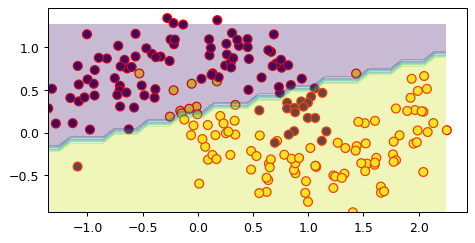

In [23]:
model = build_model(1, print_loss=True)

plot()

Iteration: 0 Loss: 0.653979815342282
Iteration: 0 Loss: 0.5050944862750055
Iteration: 5000 Loss: 0.14957001377598508
Iteration: 5000 Loss: 0.1963446269325594
Iteration: 10000 Loss: 0.14950462485906124
Iteration: 10000 Loss: 0.1967700040118315
Iteration: 15000 Loss: 0.14950235164462874
Iteration: 15000 Loss: 0.19680186148067488
Iteration: 19000 Loss: 0.1495022232972071
Iteration: 19000 Loss: 0.19680374426814262


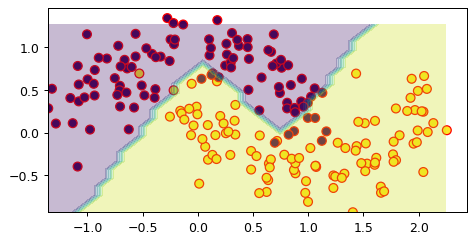

In [26]:
model = build_model(2, print_loss=True)

plot()

Iteration: 0 Loss: 0.49495350537029653
Iteration: 0 Loss: 0.44244121587345187
Iteration: 5000 Loss: 0.06862608604821879
Iteration: 5000 Loss: 0.06955201233599645
Iteration: 10000 Loss: 0.06858384847498003
Iteration: 10000 Loss: 0.06953927577259486
Iteration: 15000 Loss: 0.06858106195718248
Iteration: 15000 Loss: 0.06953850293574211
Iteration: 19000 Loss: 0.06858087374512199
Iteration: 19000 Loss: 0.06953844176794076


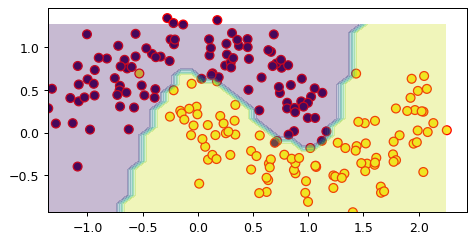

In [29]:
model = build_model(3, print_loss=True)

plot()

| hidden layer size | Loss(with batch gradientdescent) | Loss(with mini-batch gradient descent) |
| --- | --- | --- |
| 1 |  0.33342081982921445 | 0.3233764575821953 |
| 2 |  0.32410019077774144 | 0.19680374426814262 |
| 3 |  0.07075799502270258 | 0.06953844176794076 |

As you can see from the above table, mini-batch gradient descent works slightly better than batch gradient descent.

### part four:
In this part I set the learning rate to a constant and then after each iteration i decreased it.\
(lines with #new4 after them are the changed ones for this part)

### Part five:
I added sigmoid function and ReLU function with their derivatives.(lines with #new5 at the end, are the new lines that i added at this part)

###### predicting using sigmoid:

/tmp/ipykernel_18600/414823903.py:2: RuntimeWarning: overflow encountered in exp
  r = 1 / (1 - np.exp(-x))


Iteration: 0 Loss: 9244208.382934252
Iteration: 0 Loss: 9175312.549286667
Iteration: 5000 Loss: 4325116.985151748
Iteration: 5000 Loss: 4325116.985151748
Iteration: 10000 Loss: 4325116.985151748
Iteration: 10000 Loss: 4325116.985151748
Iteration: 15000 Loss: 4325116.985151748
Iteration: 15000 Loss: 4325116.985151748
Iteration: 19000 Loss: 4325116.985151748
Iteration: 19000 Loss: 4325116.985151748


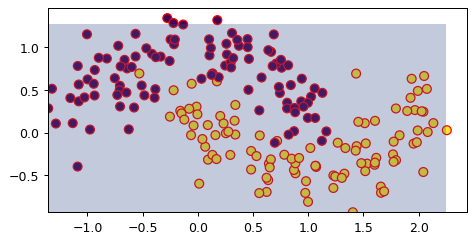

In [14]:
model = build_model(3, print_loss=True)

plot()

So tanh activation function is better than sigmoid.

##### Part six:
I found a dataset called 'load_wine' which has three classes, and i also changed nn_output_dim's value to three.\
I loaded the dataset at the beginning of the code.

Iteration: 0 Loss: 48.47969976684237
Iteration: 0 Loss: 41.78942538358692
Iteration: 5000 Loss: 1.6714815699161525
Iteration: 5000 Loss: 1.6714815699161525
Iteration: 10000 Loss: 1.6714815699161525
Iteration: 10000 Loss: 1.6714815699161525
Iteration: 15000 Loss: 1.6714815699161525
Iteration: 15000 Loss: 1.6714815699161525
Iteration: 19000 Loss: 1.6714815699161525
Iteration: 19000 Loss: 1.6714815699161525


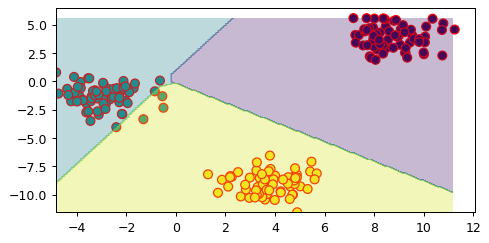

In [13]:
model = build_model(6, print_loss=True)

plot()

##### Part seven:
This part was the hardes of all!\
It needed so many changes in nearly all functions.\
Changes i made are labeled as #new7

In [20]:
model = build_model(1, 3, print_loss=True)

Iteration: 0 Loss: 1.5605383471199301
Iteration: 0 Loss: 2.6431295414123617
Iteration: 5000 Loss: 0.6980958034017687
Iteration: 5000 Loss: 0.6980958034017687
Iteration: 10000 Loss: 0.6980958034017687
Iteration: 10000 Loss: 0.6980958034017687
Iteration: 15000 Loss: 0.6980958034017687
Iteration: 15000 Loss: 0.6980958034017687
Iteration: 19000 Loss: 0.6980958034017687
Iteration: 19000 Loss: 0.6980958034017687


In [8]:
model = build_model(2, 3, print_loss=True)

Iteration: 0 Loss: 3.405935235567757
Iteration: 0 Loss: 11.958390916323554
Iteration: 5000 Loss: 0.7299805261767565
Iteration: 5000 Loss: 0.7299805261767565
Iteration: 10000 Loss: 0.7299805261767565
Iteration: 10000 Loss: 0.7299805261767565
Iteration: 15000 Loss: 0.7299805261767565
Iteration: 15000 Loss: 0.7299805261767565
Iteration: 19000 Loss: 0.7299805261767565
Iteration: 19000 Loss: 0.7299805261767565


In [12]:
model = build_model(3, 3, print_loss=True)

Iteration: 0 Loss: 2.3793464680439484
Iteration: 0 Loss: 8.358807434794866
Iteration: 5000 Loss: 0.9630198837291956
Iteration: 5000 Loss: 0.9630198837291956
Iteration: 10000 Loss: 0.9630198837291956
Iteration: 10000 Loss: 0.9630198837291956
Iteration: 15000 Loss: 0.9630198837291956
Iteration: 15000 Loss: 0.9630198837291956
Iteration: 19000 Loss: 0.9630198837291956
Iteration: 19000 Loss: 0.9630198837291956


In [15]:
model = build_model(1, 4, print_loss=True)

Iteration: 0 Loss: 1.0337743430473705
Iteration: 0 Loss: 6.375234030098313
Iteration: 5000 Loss: 0.7468202249469924
Iteration: 5000 Loss: 0.7468202249469924
Iteration: 10000 Loss: 0.7468202249469924
Iteration: 10000 Loss: 0.7468202249469924
Iteration: 15000 Loss: 0.7468202249469924
Iteration: 15000 Loss: 0.7468202249469924
Iteration: 19000 Loss: 0.7468202249469924
Iteration: 19000 Loss: 0.7468202249469924


As I changed the number of neurons in hidden layers, I understood that when i use so many neurons in each layer, Loss increases.
Also, when i decreased the number of them the same thing happend.\
So ,in conclusion, by changing the parameters i found out that these parameters(1 for the first layer and 3 for the second layer) are the best fit for our model.